<a href="https://colab.research.google.com/github/sara-javed/Pytorch-week4/blob/main/01_PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pytorch Workflow**

Let explore an example pytorch end-to-end workflow.

Resourses:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

* Ask a question - https://github.com/mrdbourke/pytorch_deep_learning/discussion

In [ ]:
what_where_covering = {1: "data (prepare and load)",
                       2: " build model",
                       3: "fitting the model to data (training)",
                       4: "making prediction and evaluting a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"
                       }
what_where_covering


{1: 'data (prepare and load)',
 2: ' build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn  # nn contains all of Pytorch building blocks for neural networks
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__


'2.6.0+cu124'

## Data (preparing and loading)

data can be almost anything... in machine learning

* Excel speadsheet
* Image of my kind
* Video  (youTube has lots of data...)
* Auido like songs or podcasts
* DNA
* Text

machine learning is a game of two parts:
1. Get data into a numerical representation.

2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known **parameter**




In [ ]:
# Create *known* parameter
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X)  , len(y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test with our data.


In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    #plot predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #show the legend
    plt.legend(prop={"size": 14});

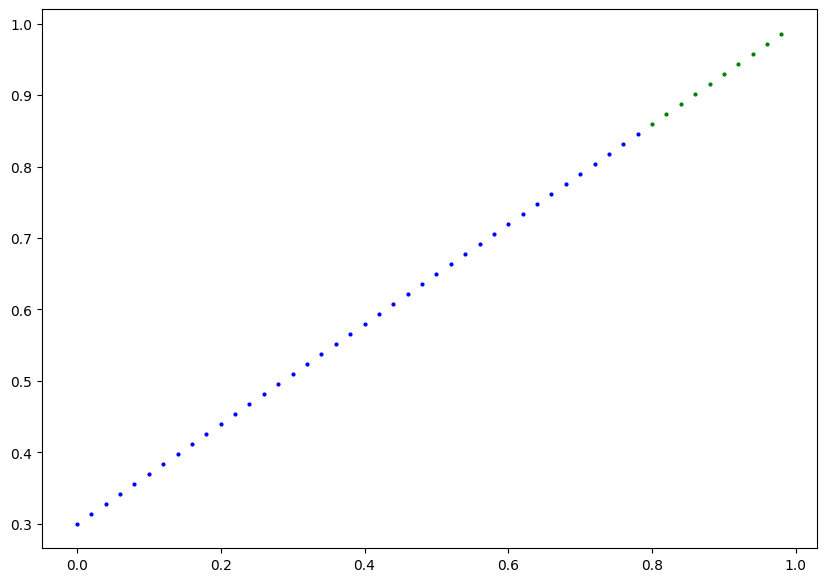

In [ ]:
plot_predictions();

## 2. Build model

our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* start with the random values (weight, bias)

* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. back propagation - https://youtu.be/IIg3gGewQ5U


In [ ]:
from typing_extensions import Required
#create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype=torch.float))
        self.bias = nn.parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #Forward method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias  #this is the linear regression formula





**PyTorch model building essentials**



1. **nn.Module** - contains the larger building blocks (layers)

2. **nn.Parameter** - contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

3. **forward()** - tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

4. **torch.optim**  - contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

See more of these essential modules via the Pytorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

**Checking the content of the PyTorch Model**

Now we've created a model, let's see What's inside...

So we can check our model parameters or what's inside our model using **.parameters()**.


In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Assume this model already exists
model_0 = LinearRegressionModel()

# Get weight and bias from the model
weight = model_0.linear_layer.weight
bias = model_0.linear_layer.bias

print(weight)
print(bias)


Parameter containing:
tensor([[-0.2191]], requires_grad=True)
Parameter containing:
tensor([0.2018], requires_grad=True)


### Making Prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts y_test based on X_test.

when we pass data through our model, it's going to run it through the forward() method.

In [ ]:
import torch
from torch import nn

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

# Create model
model_0 = LinearRegressionModel()

# Sample input test data (X_test): shape must match in_features=1
X_test = torch.tensor([[1.0], [2.0], [3.0]])

# Inference mode (no gradient calculation)
with torch.inference_mode():
    y_preds = model_0(X_test)

print("Predictions:", y_preds)


Predictions: tensor([[ 0.1004],
        [-0.3864],
        [-0.8733]])


In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 3
Number of predictions made: 3
Predicted values:
tensor([[ 0.1004],
        [-0.3864],
        [-0.8733]])


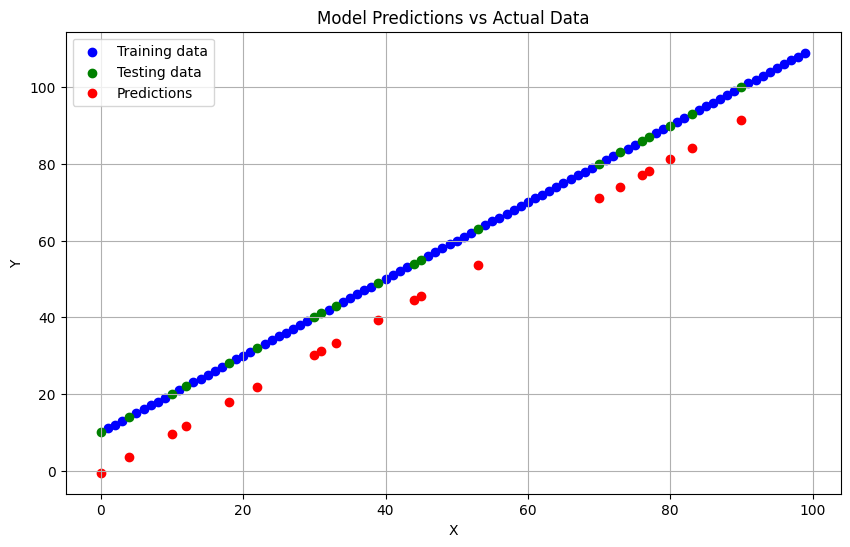

In [ ]:
# Step 1: Import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Create sample data
X = torch.arange(0, 100, dtype=torch.float32).reshape(-1, 1)
Y = X + 10  # Simple target: y = x + 10

# Step 3: Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

# Step 5: Create model instance
model_0 = LinearRegressionModel()

# Step 6: Define loss and optimizer
loss_fn = nn.L1Loss()  # MAE loss
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Step 7: Train the model
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Step 8: Predict with test data
with torch.inference_mode():
    y_preds = model_0(X_test)

# Step 9: Define the plotting function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 6))

    plt.scatter(train_data, train_labels, c="blue", label="Training data")
    plt.scatter(test_data, test_labels, c="green", label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", label="Predictions")

    plt.legend()
    plt.title("Model Predictions vs Actual Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# Step 10: Call the function
plot_predictions(X_train, Y_train, X_test, Y_test, y_preds)


**Model Training**

The whole idea of model training is fro a model to move from some unknown parameters to *known* or ideal parameters

Or in other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to idea outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters(e.g weight & bias)

And especially for PYtorch, we need
1. A training loop
2. A testing loop


In [ ]:
list (model_0.parameters())

[Parameter containing:
 tensor([[1.0218]], requires_grad=True),
 Parameter containing:
 tensor([-0.5444], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.0218]])),
             ('linear_layer.bias', tensor([-0.5444]))])

In [ ]:
#setuo a loss function
loss_fn = nn.L1Loss()

#setup on optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr=0.01 )# lr = learning rate = possibly the most important hyperparameter ypu can set

**Q:**  Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience,you'll get an idea of what works and what doesn't with your problem set.

**Building a training loop in PyTorch**

A couple of thing we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`
functions) to make prediction of data  - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grag
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of the loss **(backpropagation)**
5. Optimizer step - use the optimizer to adjust our model's parameters to try ande improve the loss (gradient descent)


In [ ]:
with torch.no_grad():
  list(model_0.parameters())


In [ ]:

model_0.parameters()

<generator object Module.parameters at 0x7a5d6710cd60>

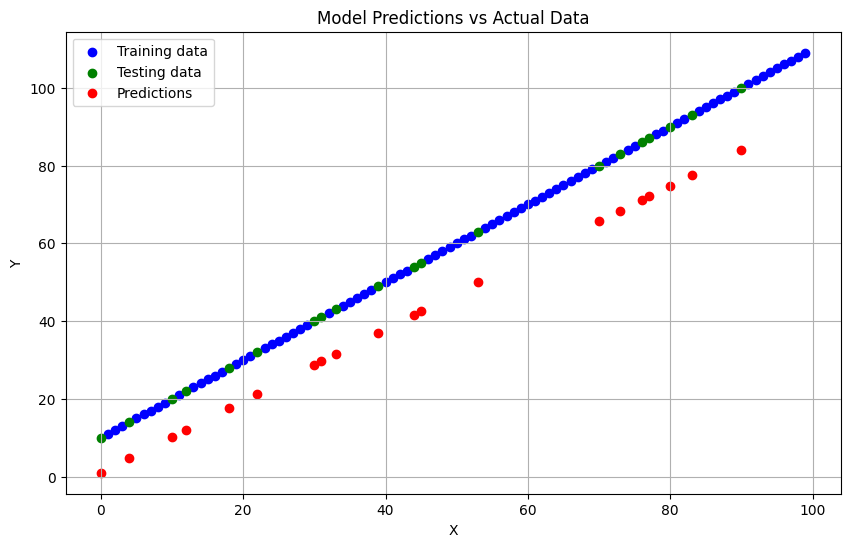

In [57]:
# Step 1: Import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Generate sample data
X = torch.arange(0, 100, dtype=torch.float32).reshape(-1, 1)
Y = X + 10  # Simple relation: Y = X + 10

# Step 3: Split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Define Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

# Step 5: Initialize the model
model_0 = LinearRegressionModel()

# Step 6: Define loss function and optimizer
loss_fn = nn.L1Loss()  # Mean Absolute Error
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Step 7: Train the model
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Step 8: Make predictions (no_grad or inference_mode to avoid tracking gradients)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Step 9: Define the plot_predictions function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 6))

    plt.scatter(train_data, train_labels, c="blue", label="Training data")
    plt.scatter(test_data, test_labels, c="green", label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", label="Predictions")

    plt.legend()
    plt.title("Model Predictions vs Actual Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# Step 10: Call the plotting function (no NameError)
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=y_preds)


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.5293]])),
             ('linear_layer.bias', tensor([-0.5344]))])

In [ ]:
weight, bias

(Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True))

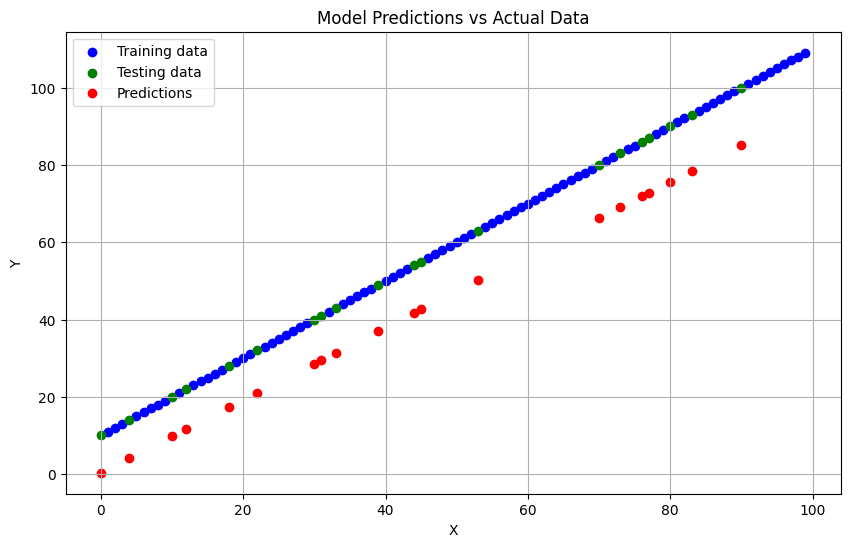

In [ ]:
# Step 1: Import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Generate sample data
X = torch.arange(0, 100, dtype=torch.float32).reshape(-1, 1)
Y = X + 10  # Simple relation: Y = X + 10

# Step 3: Split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Define Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

# Step 5: Initialize the model
model_0 = LinearRegressionModel()

# Step 6: Define loss function and optimizer
loss_fn = nn.L1Loss()  # Mean Absolute Error
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Step 7: Train the model
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Step 8: Make predictions (no_grad or inference_mode to avoid tracking gradients)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Step 9: Define the plot_predictions function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 6))

    plt.scatter(train_data, train_labels, c="blue", label="Training data")
    plt.scatter(test_data, test_labels, c="green", label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", label="Predictions")

    plt.legend()
    plt.title("Model Predictions vs Actual Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# Step 10: Call the plotting function (no NameError)
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=y_preds)


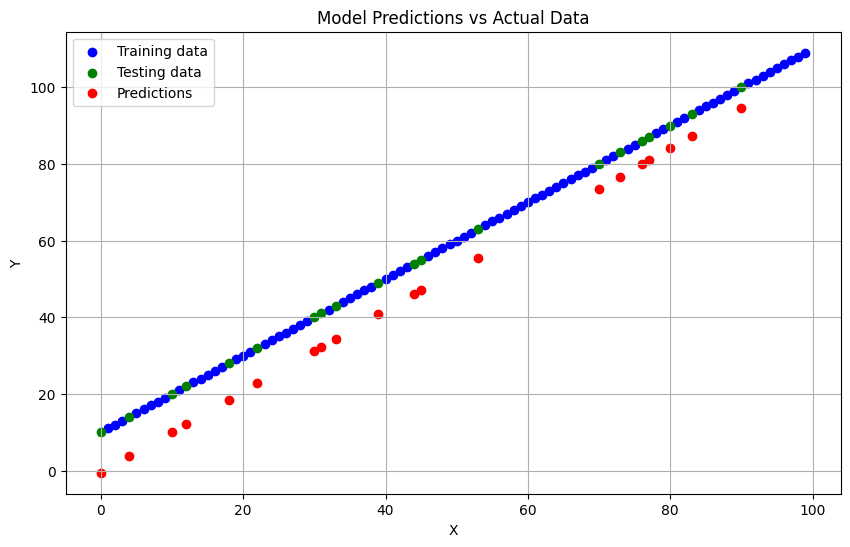

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=y_preds_new)


In [ ]:
import torch

torch.manual_seed(42)

# Number of epochs
epochs = 200  # epochs is the number of times our model will loop over training data

# Lists to track values during training
epochs_counts = []
train_loss_values = []
test_loss_values = []

# 0. Loop over the data
for epoch in range(epochs):

    # 1. Training mode
    model_0.train()

    # 2. Forward pass
    y_pred = model_0(X_train)

    # 3. Compute training loss
    loss = loss_fn(y_pred, Y_train)  # FIXED: Y_train (not y_train)

    # 4. Zero gradients
    optimizer.zero_grad()

    # 5. Backpropagation
    loss.backward()

    # 6. Step optimizer
    optimizer.step()

    # 7. Evaluation mode (no gradient tracking)
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)

        # 8. Compute test loss
        test_loss = loss_fn(test_pred, Y_test)

    # 9. Logging every 10 epochs
    if epoch % 10 == 0:
        epochs_counts.append(epoch)
        train_loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())

        print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")
        print("Model Parameters:")
        print(model_0.state_dict())


Epoch: 0 | Train Loss: 12.6494 | Test Loss: 13.1541
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.4479]])), ('linear_layer.bias', tensor([0.3829]))])
Epoch: 10 | Train Loss: 4.1245 | Test Loss: 6.9826
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.2787]])), ('linear_layer.bias', tensor([0.3974]))])
Epoch: 20 | Train Loss: 6.8774 | Test Loss: 17.7558
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.5609]])), ('linear_layer.bias', tensor([0.4202]))])
Epoch: 30 | Train Loss: 9.6888 | Test Loss: 15.4775
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.5052]])), ('linear_layer.bias', tensor([0.4382]))])
Epoch: 40 | Train Loss: 15.5722 | Test Loss: 10.9228
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.3889]])), ('linear_layer.bias', tensor([0.4544]))])
Epoch: 50 | Train Loss: 5.3519 | Test Loss: 19.0031
Model Parameters:
OrderedDict([('linear_layer.weight', tensor([[1.5899]])), ('linear_layer.bias', 